In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_grp(in_path):
    with open(in_path, 'r') as f:
        lines = f.readlines()
        # second conditional ignores comment lines
        return [line.split('\t') for line in lines ]


in_path= "PAAD.gct"
a=read_grp(in_path)
missing_values = ["n/a", "na", "--","","NA","None","NaN\n"]

df=pd.DataFrame(a)
df.to_csv('data.csv')
df = pd.read_csv("data.csv", na_values = missing_values)

C:\Users\52070730\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,174,175,176,177,178,179,180,181,182,183
0,0,#1.3\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,18465,183,0,124\n,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,id,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor\n
3,3,participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,...,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d,a8sy,a8lh,aapl\n
4,4,sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,...,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor\n
5,5,mRNAseq_cluster,1,2,3,1,4,3,3,2,...,2,5,3,4,5,NaN,2,3,1,5\n
6,6,bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,...,tcga-xd-aauh,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl\n
7,7,bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,...,b46b5a4c-59fc-4769-b05a-d15f9aaa753a,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec\n
8,8,vital_status,dead,alive,dead,alive,dead,dead,alive,dead,...,alive,dead,alive,alive,alive,alive,alive,alive,alive,alive\n
9,9,days_to_death,66,NaN,293,NaN,627,607,NaN,691,...,NaN,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA\n


# Tasks:
1. Data cleaning and check the distribution of gene expression across samples


# 1.	How many genes/rows had NaNs?

In [5]:
df=df.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)
df=df.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'NaN',  np.nan, regex=True)
df.head()
df['No Of NaNs']=df.isnull().sum(axis=1)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,175,176,177,178,179,180,181,182,183,No Of NaNs
0,0,#1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183
1,1,18465,183,0,124,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180
2,2,id,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,...,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor,0
3,3,participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,...,aaui,aaul,a8t3,a8t5,a89d,a89d,a8sy,a8lh,aapl,0
4,4,sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,...,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,0


# A.	Remove rows (genes) with NaNs

In [6]:
#Removing all the NaNs.
df=df.dropna()

In [7]:
#Verifying the NaNs has been removed or not!
df.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
             ..
155           0
156           0
157           0
158           0
159           0
160           0
161           0
162           0
163           0
164           0
165           0
166           0
167           0
168           0
169           0
170           0
171           0
172           0
173           0
174           0
175           0
176           0
177           0
178           0
179           0
180           0
181           0
182           0
183           0
No Of NaNs    0
Length: 186, dtype: int6

# B.	Generate boxplot for gene expression for all samples. 

In [8]:
#Transposing DataFrame to plot boxplot.
new_df=df.set_index('0').T[1:]
new_df=new_df.iloc[:,39:]
new_df=new_df.astype(np.float64)

In [9]:
new_df.head()

0,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMP,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
1,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,11.8,...,8.6,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3
2,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,11.4,...,8.7,8.1,8.8,5.8,8.5,10.0,9.3,12.4,9.8,8.9
3,6.4,7.3,13.1,10.1,9.7,9.2,5.9,9.9,9.8,11.1,...,8.8,8.4,9.1,3.9,8.1,10.0,9.4,13.5,9.8,9.2
4,5.8,7.5,13.8,8.6,9.6,9.4,6.4,10.5,9.2,11.6,...,8.6,8.6,8.9,5.2,8.5,9.7,9.4,12.5,9.7,9.3
5,6.7,7.4,14.6,10.1,9.8,9.3,6.5,10.1,9.8,11.2,...,8.9,8.2,8.4,5.9,8.6,9.9,9.3,13.0,10.1,9.2


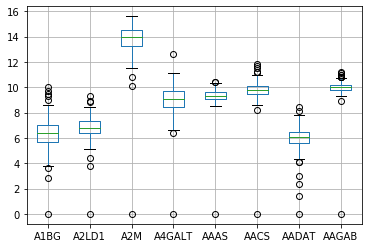

In [10]:
#Boxplot for gene expression for all samples.
new_df.boxplot(column=['A1BG','A2LD1','A2M','A4GALT','AAAS','AACS','AADAT','AAGAB'])
plt.show()

#Note:- I am generating boxplot for few samples as we have 14098 sample which is not easily can be ploted.

# 2.	How is the distribution of gene expression across samples.? 

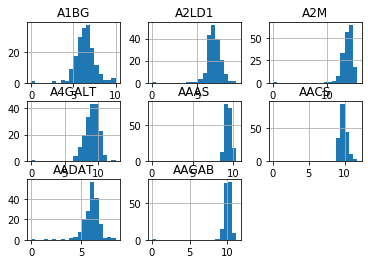

In [11]:
#Distribution of gene expression for few samples.
new_df[['A1BG','A2LD1','A2M','A4GALT','AAAS','AACS','AADAT','AAGAB']].hist(bins=20)
plt.show()

In [12]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,175,176,177,178,179,180,181,182,183,No Of NaNs
2,2,id,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,...,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor,0
3,3,participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,...,aaui,aaul,a8t3,a8t5,a89d,a89d,a8sy,a8lh,aapl,0
4,4,sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,...,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,0
6,6,bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,...,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl,0
7,7,bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,...,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec,0


2. Subset the data for only the Exocrine (adenocarcinoma) tumors and remove Neuroendocrine tumors based on the PCA for all samples. 
#Note:- I am not getting the questions which data set to with now.